# Data Analysis

## Librerias

### Instalacion

In [1]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium

### Importacion

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

## Lectura Datos

In [3]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,830.000000,8.300000e+02,830,830,150.000000,488,313,830.000000,830.000000,830,...,830,829,704,830.000000,830,830,830,830,107,8.300000e+02
unique,NaN,NaN,554,5,NaN,2,7,NaN,NaN,2,...,2,2,2,NaN,524,574,550,546,66,NaN
top,NaN,NaN,https://www.olx.com.gt/item/apartamento-en-ven...,2020-05-25,NaN,No,Entre 5 y 10 años,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,APARTAMENTO EN ZONA 15 / ACODI,2020-05-16T03:21:04-06:00,2020-08-13T03:22:20-06:00,Apartamento en Venta Santa Catarina Pinula Vil...,11222,NaN
freq,NaN,NaN,6,310,NaN,375,97,NaN,NaN,824,...,575,819,612,NaN,7,8,8,6,4,NaN
mean,415.500000,1.091765e+09,NaN,NaN,904.273333,NaN,NaN,1.966265,2.238554,NaN,...,NaN,NaN,NaN,1.403614,NaN,NaN,NaN,NaN,NaN,3.599492e+07
std,239.744656,1.911375e+07,NaN,NaN,5360.235927,NaN,NaN,0.832871,0.835554,NaN,...,NaN,NaN,NaN,2.964972,NaN,NaN,NaN,NaN,NaN,2.352221e+07
min,1.000000,1.023789e+09,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.263970e+06
25%,208.250000,1.100198e+09,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.401211e+07
50%,415.500000,1.100356e+09,NaN,NaN,1.000000,NaN,NaN,2.000000,2.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.589886e+07
75%,622.750000,1.100374e+09,NaN,NaN,750.000000,NaN,NaN,2.000000,3.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,6.113832e+07


## Data Wrangling

### Conversion Series

In [4]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,830,830,830,830,150.000000,488,313,830.000000,830.000000,830,...,830,829,704,830.000000,830,830,830,830,830,830
unique,830,554,554,5,NaN,2,7,NaN,NaN,2,...,2,2,2,NaN,524,574,550,546,67,131
top,460,1100373467,https://www.olx.com.gt/item/apartamento-en-ven...,2020-05-25 00:00:00,NaN,No,Entre 5 y 10 años,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,APARTAMENTO EN ZONA 15 / ACODI,2020-05-16T03:21:04-06:00,2020-08-13T03:22:20-06:00,Apartamento en Venta Santa Catarina Pinula Vil...,nan,24012106
freq,1,6,6,310,NaN,375,97,NaN,NaN,824,...,575,819,612,NaN,7,8,8,6,723,169
first,NaN,NaN,NaN,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-05-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,904.273333,NaN,NaN,1.966265,2.238554,NaN,...,NaN,NaN,NaN,1.403614,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5360.235927,NaN,NaN,0.832871,0.835554,NaN,...,NaN,NaN,NaN,2.964972,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [5]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
556,557,1023789298,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI,2020-05-23T14:54:00-06:00,2020-08-21T14:54:00-06:00,Edificio\n– Salón social\n– Parqueo de visitas...,nan,24012106
557,558,1023944274,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...",2020-05-23T14:49:40-06:00,2020-08-21T14:49:40-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106
559,560,1029720345,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,4,"VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...",2020-05-23T14:20:53-06:00,2020-08-21T14:20:53-06:00,Edificio:\n– Casa club con piscina\n– Cancha d...,nan,24012106
564,565,1030164820,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI",2020-05-23T14:19:45-06:00,2020-08-21T14:19:45-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106
578,579,1030987380,https://www.olx.com.gt/item/alquilo-renta-apar...,2020-05-25,NaN,No,NaN,1,2,No,...,US$,Apartamento,Inmobiliaria,1,ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...,2020-05-22T19:20:27-06:00,2020-08-20T19:20:27-06:00,Condominio\n– Áreas verdes\n– Casa club\n– Gim...,nan,24012106
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3,No,...,US$,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053
726,727,1034515498,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3,No,...,US$,Apartamento,Inmobiliaria,0,"ALQUILO APARTAMENTO EN VILLA RISHO, ZONA 14 A...",2020-05-22T18:42:50-06:00,2020-08-20T18:42:50-06:00,Edificio\n– Business center\n– Área de jardín\...,nan,24012106
584,585,1039708833,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,Si,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO AMUEBLADO EN ZONA 10 / ACODI,2020-05-22T17:52:22-06:00,2020-08-20T17:52:22-06:00,– Área de construcción: 175 m2\n\n– Sala\n– Co...,nan,24012106
521,521,1039739280,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,1,VENDO APARTAMENTO EN ZONA 10 OPCIÓN 2/ ACODI,2020-05-22T17:51:44-06:00,2020-08-20T17:51:44-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106
522,522,1040145818,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,2,No,...,US$,Apartamento,Inmobiliaria,0,ALQUILO APARTAMENTO EN ZONA 10 / ACODI,2020-05-22T17:47:54-06:00,2020-08-20T17:47:54-06:00,– Sala\n– Comedor\n– Cocina\n– Sala familiar\n...,nan,24012106


### Cambio Moneda Precio

In [6]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id,precio_real
556,557,1023789298,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3,No,...,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI,2020-05-23T14:54:00-06:00,2020-08-21T14:54:00-06:00,Edificio\n– Salón social\n– Parqueo de visitas...,nan,24012106,9612.50
557,558,1023944274,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...",2020-05-23T14:49:40-06:00,2020-08-21T14:49:40-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106,1647474.84
559,560,1029720345,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,3,No,...,Apartamento,Inmobiliaria,4,"VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...",2020-05-23T14:20:53-06:00,2020-08-21T14:20:53-06:00,Edificio:\n– Casa club con piscina\n– Cancha d...,nan,24012106,5190750.00
564,565,1030164820,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI",2020-05-23T14:19:45-06:00,2020-08-21T14:19:45-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106,1647474.84
578,579,1030987380,https://www.olx.com.gt/item/alquilo-renta-apar...,2020-05-25,NaN,No,NaN,1,2,No,...,Apartamento,Inmobiliaria,1,ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...,2020-05-22T19:20:27-06:00,2020-08-20T19:20:27-06:00,Condominio\n– Áreas verdes\n– Casa club\n– Gim...,nan,24012106,4806.25
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3,No,...,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053,23070.00
726,727,1034515498,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3,No,...,Apartamento,Inmobiliaria,0,"ALQUILO APARTAMENTO EN VILLA RISHO, ZONA 14 A...",2020-05-22T18:42:50-06:00,2020-08-20T18:42:50-06:00,Edificio\n– Business center\n– Área de jardín\...,nan,24012106,19225.00
584,585,1039708833,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,Si,NaN,2,2,No,...,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO AMUEBLADO EN ZONA 10 / ACODI,2020-05-22T17:52:22-06:00,2020-08-20T17:52:22-06:00,– Área de construcción: 175 m2\n\n– Sala\n– Co...,nan,24012106,13842.00
521,521,1039739280,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2,No,...,Apartamento,Inmobiliaria,1,VENDO APARTAMENTO EN ZONA 10 OPCIÓN 2/ ACODI,2020-05-22T17:51:44-06:00,2020-08-20T17:51:44-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106,1647474.84
522,522,1040145818,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,2,No,...,Apartamento,Inmobiliaria,0,ALQUILO APARTAMENTO EN ZONA 10 / ACODI,2020-05-22T17:47:54-06:00,2020-08-20T17:47:54-06:00,– Sala\n– Comedor\n– Cocina\n– Sala familiar\n...,nan,24012106,9228.00


### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [7]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    347
Venta       207
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

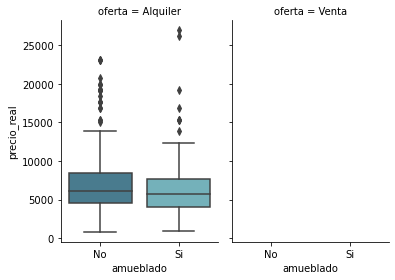

In [8]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

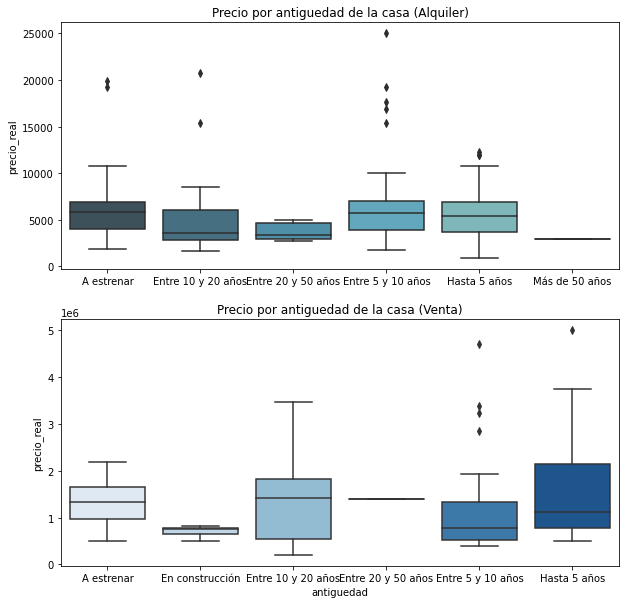

In [9]:
# Obteniendo los diferentes subsets, para venta y alquiler.
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'antiguedad']]
dfTemp1['antiguedad'] = dfTemp1['antiguedad'].astype('category')

dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'antiguedad']]
dfTemp2['antiguedad'] = dfTemp2['antiguedad'].astype('category')


# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Generando la primera grafica (Alquiler)
g1 = sns.boxplot(y='precio_real', x='antiguedad', data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
#g1.set(xticklabels=[])
g1.set(title='Precio por antiguedad de la casa (Alquiler)')
g1.set(xlabel=None)

# Generando la segunda grafica (Venta)
g2 = sns.boxplot(y='precio_real', x='antiguedad', data=dfTemp2, ax=ax[1], palette = 'Blues')
#g2.set(xticklabels=[])
g2.set(title='Precio por antiguedad de la casa (Venta)')
#g2.set(xlabel=None)

# Se muestra la grafica
plt.show()

### Precio por banos

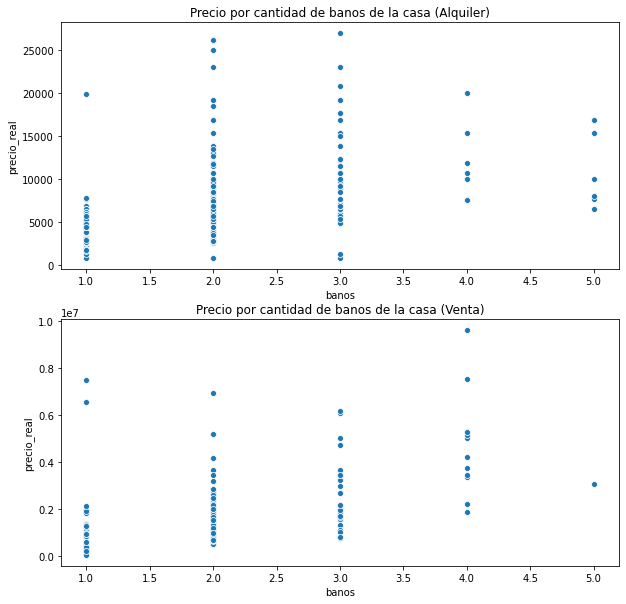

In [10]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'banos']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'banos']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="banos", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por cantidad de banos de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="banos", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

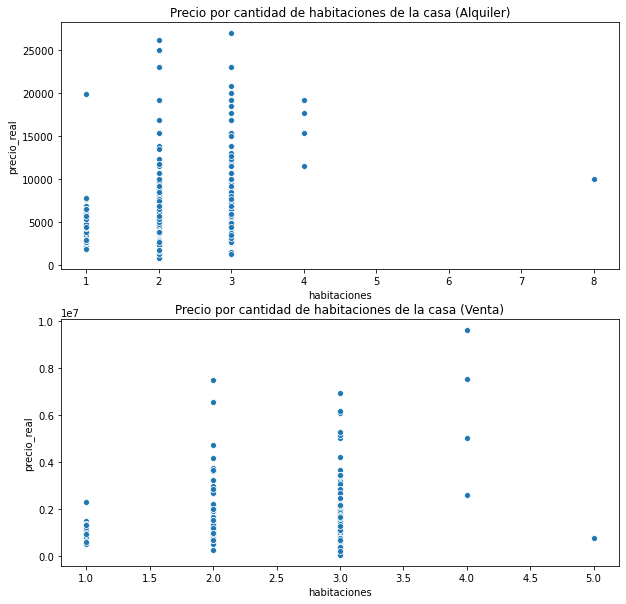

In [11]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'habitaciones']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'habitaciones']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="habitaciones", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por cantidad de habitaciones de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="habitaciones", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por cantidad de habitaciones de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

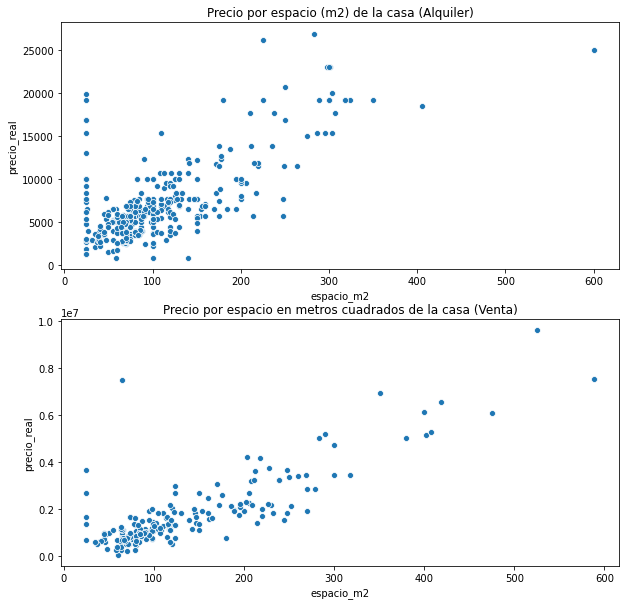

In [12]:
# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'espacio_m2']]
dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'espacio_m2']]

# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Se genera la primera grafica
g1 = sns.scatterplot(x="espacio_m2", y="precio_real", data=dfTemp1, ax = ax[0])
g1.set(title='Precio por espacio (m2) de la casa (Alquiler)')

# Se genera la segunda grafica
g2 = sns.scatterplot(x="espacio_m2", y="precio_real", data=dfTemp2, ax = ax[1])
g2.set(title='Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

### Precio y ubicacion

In [27]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 5,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [22]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 500,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

### Precio por parqueo (tiene o no)

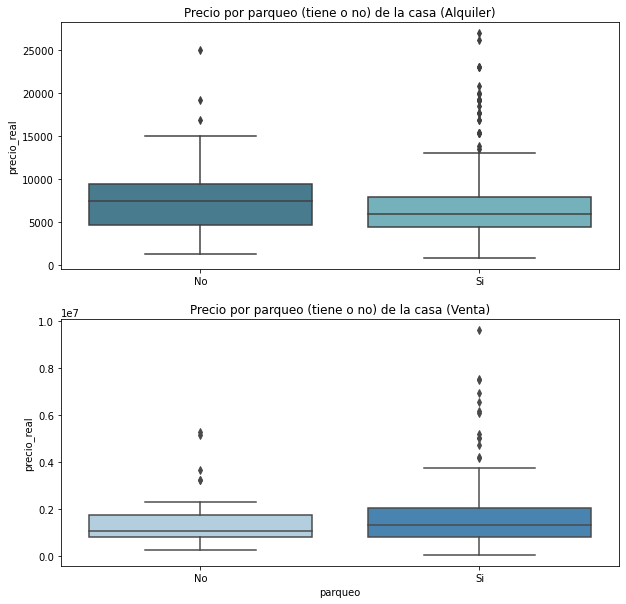

In [29]:
# Obteniendo los diferentes subsets, para venta y alquiler.
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'parqueo']]
dfTemp1['parqueo'] = dfTemp1['parqueo'].astype('category')

dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'parqueo']]
dfTemp2['parqueo'] = dfTemp2['parqueo'].astype('category')


# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Generando la primera grafica (Alquiler)
g1 = sns.boxplot(y='precio_real', x='parqueo', data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
#g1.set(xticklabels=[])
g1.set(title='Precio por parqueo (tiene o no) de la casa (Alquiler)')
g1.set(xlabel=None)

# Generando la segunda grafica (Venta)
g2 = sns.boxplot(y='precio_real', x='parqueo', data=dfTemp2, ax=ax[1], palette = 'Blues')
#g2.set(xticklabels=[])
g2.set(title='Precio por parqueo (tiene o no) de la casa (Venta)')
#g2.set(xlabel=None)

# Se muestra la grafica
plt.show()

### Precio por tipo(casa o apartamento)

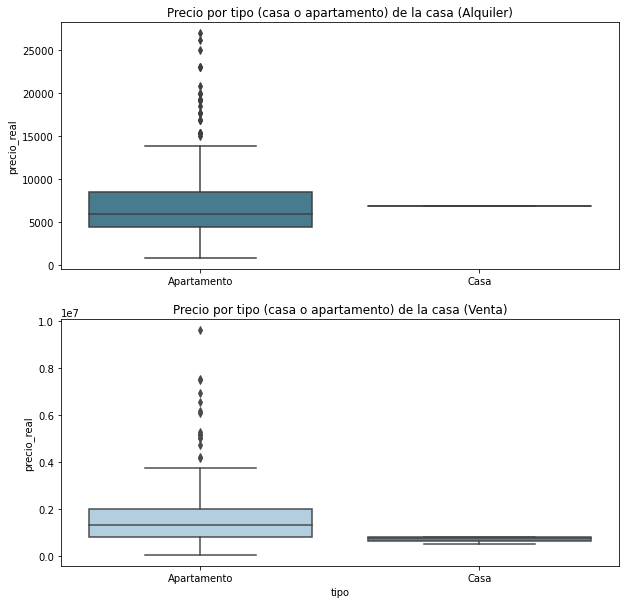

In [30]:
# Obteniendo los diferentes subsets, para venta y alquiler.
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', ['precio_real', 'tipo']]
dfTemp1['tipo'] = dfTemp1['tipo'].astype('category')

dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', ['precio_real', 'tipo']]
dfTemp2['tipo'] = dfTemp2['tipo'].astype('category')


# Definiendo el lienzo como subplots de 2 filas y 1 columna
fig, ax = plt.subplots(2, 1)

# Definiendo tamano
fig.set_figheight(10)
fig.set_figwidth(10)

# Generando la primera grafica (Alquiler)
g1 = sns.boxplot(y='precio_real', x='tipo', data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
#g1.set(xticklabels=[])
g1.set(title='Precio por tipo (casa o apartamento) de la casa (Alquiler)')
g1.set(xlabel=None)

# Generando la segunda grafica (Venta)
g2 = sns.boxplot(y='precio_real', x='tipo', data=dfTemp2, ax=ax[1], palette = 'Blues')
#g2.set(xticklabels=[])
g2.set(title='Precio por tipo (casa o apartamento) de la casa (Venta)')
#g2.set(xlabel=None)

# Se muestra la grafica
plt.show()